### 1. Loading Data

In [1]:
supercon_data <- read.csv('dataset/train.csv')

In [2]:
head(supercon_data,5)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23


### 2. Data Cleaning

2.1.1. Leverages, Outliers and Influence

In [4]:
lev_fit = lm(critical_temp ~ ., data = supercon_data)
# Use function "hatvalues" for the leverages from the lm object
leverages = hatvalues(lev_fit)
max_i = which.max(leverages)

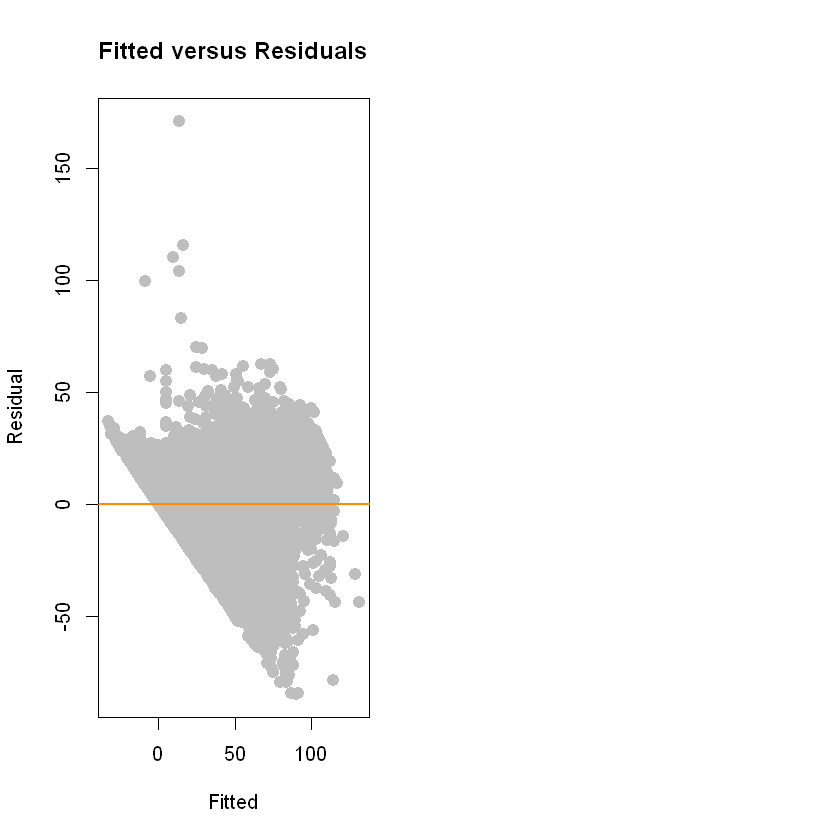

In [13]:
par(mfrow=c(1,2))
plot(fitted(lev_fit), resid(lev_fit), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residual",cex=2,
     main = "Fitted versus Residuals")
abline(h = 0, col = "darkorange", lwd = 2)

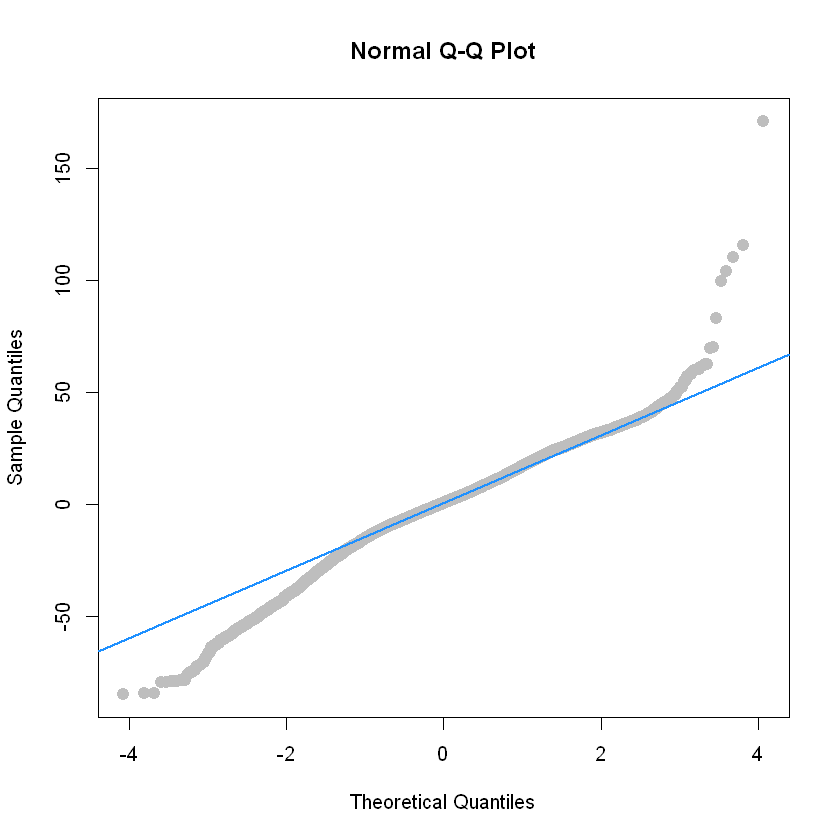

In [15]:
qqnorm(resid(lev_fit), col = "grey",pch=20,cex=2)
qqline(resid(lev_fit), col = "dodgerblue", lwd = 2)

In [9]:
lev_fit_cd = cooks.distance(lev_fit)

In [10]:
sum(lev_fit_cd > 4/length(lev_fit_cd))

[1] 792

In [11]:
inf_i = which(lev_fit_cd > 4/length(lev_fit_cd))
supercon_data_ou_tr = supercon_data[-inf_i,]

In [16]:
lev_fit_2 = lm(critical_temp ~ ., data = supercon_data_ou_tr)

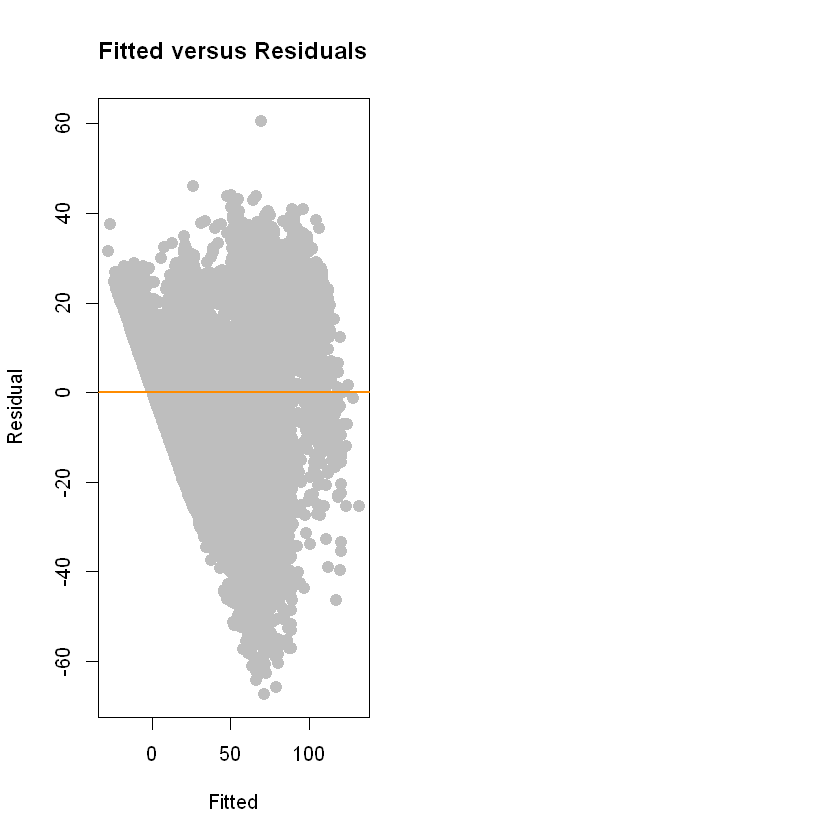

In [17]:
par(mfrow=c(1,2))
plot(fitted(lev_fit_2), resid(lev_fit_2), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residual",cex=2,
     main = "Fitted versus Residuals")
abline(h = 0, col = "darkorange", lwd = 2)

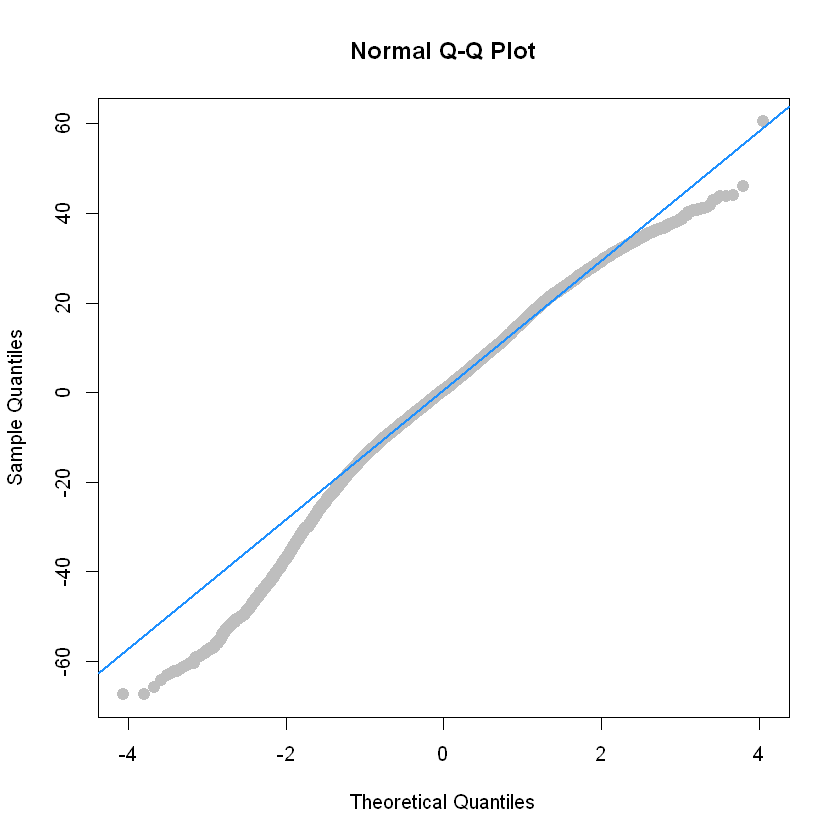

In [18]:
qqnorm(resid(lev_fit_2), col = "grey",pch=20,cex=2)
qqline(resid(lev_fit_2), col = "dodgerblue", lwd = 2)

In [ ]:
qqnorm(resid(lm_disp_wt2), col = "grey",pch=20,cex=2)
qqline(resid(lm_disp_wt2), col = "dodgerblue", lwd = 2)

Removing High leverage points has improved the residual and normality assumptions

### 3. Correlation Analysis

In [ ]:
library(corrplot)

In [ ]:
library(dplyr)
library(caret)

In [ ]:
# Correlation plot - High Correlation among variables
# It can be seen that high correlation exists!
correlations <- cor(supercon_data)
corrplot(correlations, method="circle",tl.cex=0.5)

In [ ]:
cor_matrix = cor(supercon_data)
cor_matrix[1:5,1:5] #glimpse of the correlation matrix created

In [ ]:
drop = findCorrelation(cor_matrix, cutoff = .6)
drop = names(supercon_data)[drop]
supercon_data_corr_rem = supercon_data[ , !(names(supercon_data) %in% drop)]

In [ ]:
correlations <- cor(supercon_data_corr_rem)
corrplot(correlations, method="circle",tl.cex=0.5)

In [ ]:
#Getting the highly correlated variable groups for better explainability
row_col_mat = which(cor_matrix>=0.6, arr.ind=TRUE)
rc_df = as.data.frame(row_col_mat)
correlated_var_groups = rc_df %>% group_by(row) %>% 
summarize(col = paste(sort(unique(col)),collapse=", "))

### First Cut Model Creation
 

In [ ]:
model<-lm(critical_temp~.,data=supercon_data_corr_rem)
summary(model)

### 3. AIC/BIC Methods

In [5]:
#construct full model
model_full = lm(critical_temp~.,data=supercon_data)

In [9]:
fit_back_aic = step(model_full, direction = "backward")
fit_back_aic

Start:  AIC=122021.5
critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entr


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    wtd_std_atomic_mass + mean_fie + wtd_mean_fie + gmean_fie + 
    wtd_gmean_fie + entropy_fie + wtd_entropy_fie + range_fie + 
    wtd_range_fie + std_fie + mean_atomic_radius + wtd_mean_atomic_radius + 
    wtd_gmean_atomic_radius + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + wtd_range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + std_Density + 
    wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entropy_ElectronAffinity + 
    wtd_entropy_ElectronAffinity + range_ElectronAffinity + wtd_range_ElectronAffinity + 
    std_ElectronA

In [7]:
n = nrow(supercon_data)
fit_back_bic = step(model_full, direction = "backward", k=log(n))
fit_back_bic

Start:  AIC=122674.6
critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entr


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    mean_fie + wtd_mean_fie + gmean_fie + wtd_gmean_fie + entropy_fie + 
    wtd_entropy_fie + range_fie + wtd_range_fie + std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + wtd_gmean_atomic_radius + entropy_atomic_radius + 
    wtd_entropy_atomic_radius + range_atomic_radius + wtd_range_atomic_radius + 
    std_atomic_radius + wtd_std_atomic_radius + mean_Density + 
    gmean_Density + wtd_gmean_Density + entropy_Density + wtd_entropy_Density + 
    range_Density + std_Density + wtd_std_Density + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_range_ElectronAffinity + std_ElectronAffinity + 
    wtd_std_ElectronAffinity + mean_FusionHeat + wtd_mean_FusionHeat + 


In [10]:
summary(fit_back_aic)


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    wtd_std_atomic_mass + mean_fie + wtd_mean_fie + gmean_fie + 
    wtd_gmean_fie + entropy_fie + wtd_entropy_fie + range_fie + 
    wtd_range_fie + std_fie + mean_atomic_radius + wtd_mean_atomic_radius + 
    wtd_gmean_atomic_radius + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + wtd_range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + std_Density + 
    wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entropy_ElectronAffinity + 
    wtd_entropy_ElectronAffinity + range_ElectronAffinity + wtd_range_ElectronAffinity + 
    std_ElectronA

In [8]:
summary(fit_back_bic)


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    mean_fie + wtd_mean_fie + gmean_fie + wtd_gmean_fie + entropy_fie + 
    wtd_entropy_fie + range_fie + wtd_range_fie + std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + wtd_gmean_atomic_radius + entropy_atomic_radius + 
    wtd_entropy_atomic_radius + range_atomic_radius + wtd_range_atomic_radius + 
    std_atomic_radius + wtd_std_atomic_radius + mean_Density + 
    gmean_Density + wtd_gmean_Density + entropy_Density + wtd_entropy_Density + 
    range_Density + std_Density + wtd_std_Density + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_range_ElectronAffinity + std_ElectronAffinity + 
    wtd_std_ElectronAffinity + mean_FusionHeat + wtd_mean_FusionHeat + 
